Mouse_Olfactory_single_slice

In [1]:
import random
import numpy as np
import scanpy as sc
import torch
import argparse
import yaml
from yaml import SafeLoader
from package.data_processing import LoadAdata
from package.model import STAMGC
import warnings


warnings.filterwarnings('ignore')
import os
os.chdir('/home/lsfcj/lsf/第一个工作3.0')
# os.chdir('/srv/homes/zzy/lsf/第一个工作3.0')

In [2]:
file_fold='/data/lsfcj/DATA'
# file_fold='/srv/storage1/hdd/cff/lsfcj/DATA'

args = argparse.Namespace(
    dataset='Mouse_Olfactory_Bulb',
    slice='Stereo_seq',
    batch_size=1,
    platform='Stereo_seq',
    parameter='Stereo_seq',
    spot_size=20,
    config='./train_config.yaml',
    label=False,
)
config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.parameter)]

slice_path = os.path.join(file_fold, args.dataset, args.slice)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8' 
torch.use_deterministic_algorithms(True)

In [ ]:
# adata = LoadAdata(path=slice_path,dataset=args.dataset,slice=args.slice,config=config,args=args).run()
# print(adata)

In [3]:
adata=sc.read_h5ad('./results/'+args.dataset+'/'+args.slice+'/data_processing.h5ad')
print(adata)

KeyboardInterrupt: 

=== Generate pseudo labels! ===


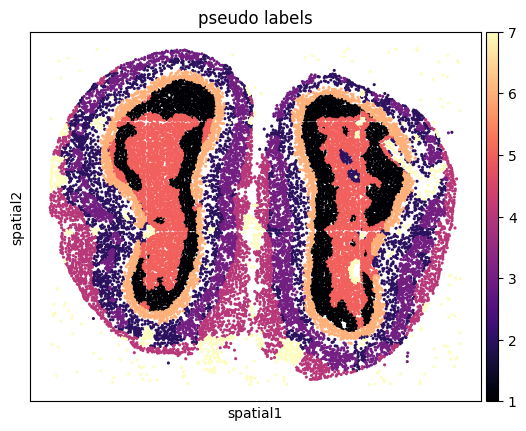

=== train ===
epoch: 0  total_loss: 8.105999946594238  alpha: 6  beta: 0.1  gama: 0.9
epoch: 1  total_loss: 8.010948181152344  alpha: 6  beta: 0.1  gama: 0.9
epoch: 2  total_loss: 7.936904430389404  alpha: 6  beta: 0.1  gama: 0.9
epoch: 3  total_loss: 7.8491034507751465  alpha: 6  beta: 0.1  gama: 0.9
epoch: 4  total_loss: 7.768799304962158  alpha: 6  beta: 0.1  gama: 0.9
epoch: 5  total_loss: 7.7065043449401855  alpha: 6  beta: 0.1  gama: 0.9
epoch: 6  total_loss: 7.647381782531738  alpha: 6  beta: 0.1  gama: 0.9
epoch: 7  total_loss: 7.604788303375244  alpha: 6  beta: 0.1  gama: 0.9
epoch: 8  total_loss: 7.559598922729492  alpha: 6  beta: 0.1  gama: 0.9
epoch: 9  total_loss: 7.514858245849609  alpha: 6  beta: 0.1  gama: 0.9
epoch: 10  total_loss: 7.497939109802246  alpha: 6  beta: 0.1  gama: 0.9
epoch: 11  total_loss: 7.472287178039551  alpha: 6  beta: 0.1  gama: 0.9
epoch: 12  total_loss: 7.45829963684082  alpha: 6  beta: 0.1  gama: 0.9
epoch: 13  total_loss: 7.444230079650879  alph

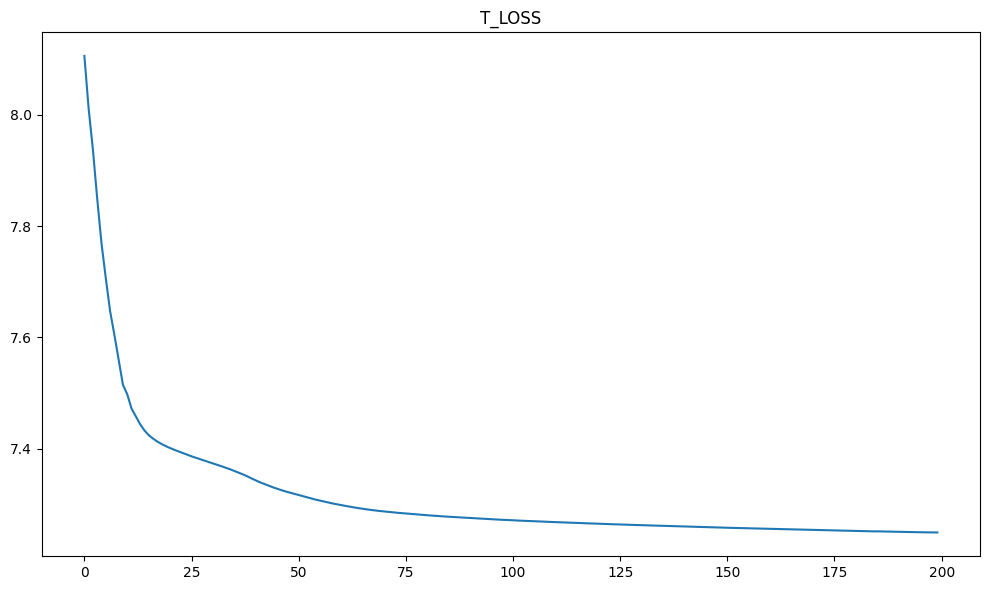

=== load ===
embedding generated, go clustering
calculate SC and DB
SC: 0.28125042
DB: 1.2970630210569427


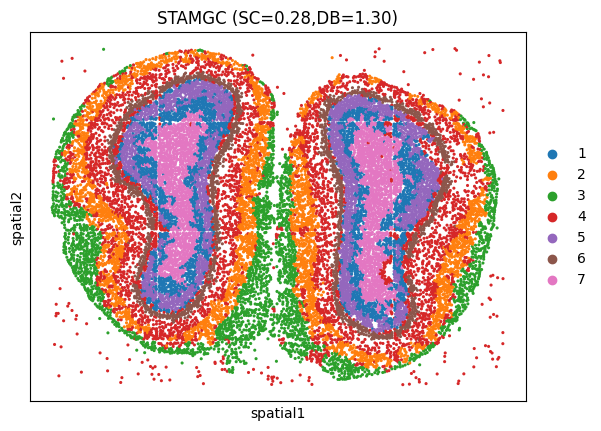

complete!


In [5]:
# from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = (10, 5)
adata=STAMGC(adata,config,args).run()

In [3]:
adata=sc.read_h5ad('./results/Mouse_Olfactory_Bulb/Stereo_seq/STAMGC.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 19527 × 3000
    obs: 'pseudo_labels', 'domain'
    var: 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'db', 'domain_colors', 'hvg', 'log1p', 'sc', 'smooth_r'
    obsm: 'emb_pca', 'gene_feat', 'graph_neigh', 'graph_neigh_coor', 'h', 'mlp', 'negative_mask', 'smooth_gene', 'spatial', 'z'


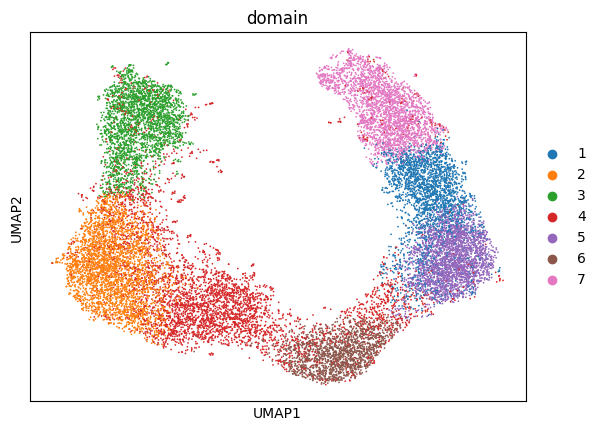

In [4]:
from matplotlib import pyplot as plt

color=['domain']
sc.pp.neighbors(adata, use_rep='z', metric='cosine')
sc.tl.umap(adata)
# plt.rcParams['figure.figsize'] = (6, 5)
for i in color:
    sc.pl.umap(adata, color=i, show=False)
    plt.savefig('./results/'+args.dataset+'/'+args.slice+'/'+i+'_umap.png', bbox_inches='tight',dpi=600)
    plt.show()

['3' '4' '2' '6' '5' '1' '7']
1


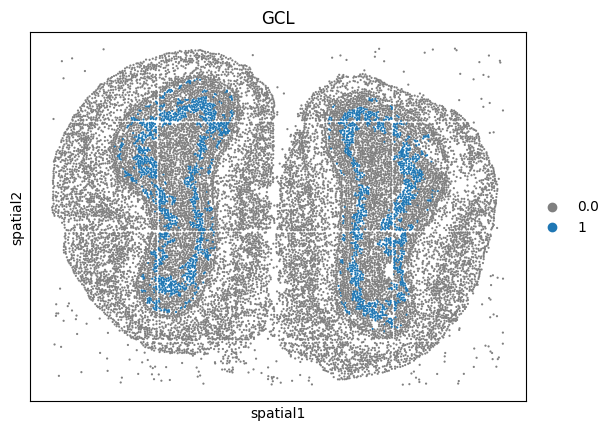

2


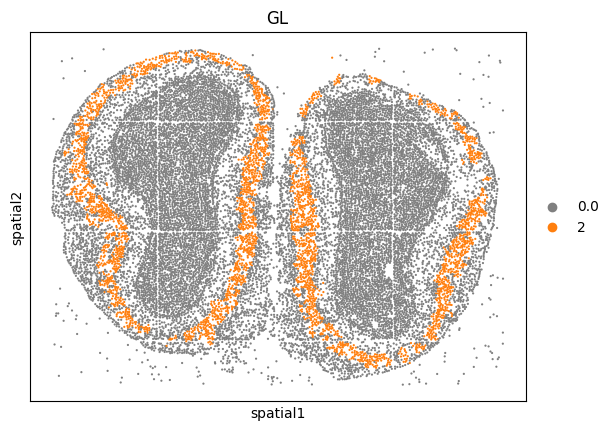

3


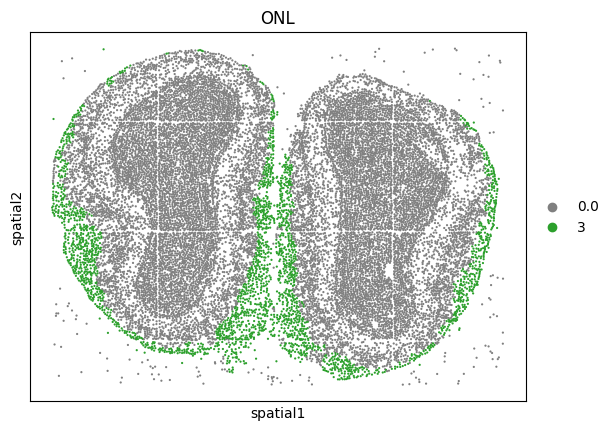

4


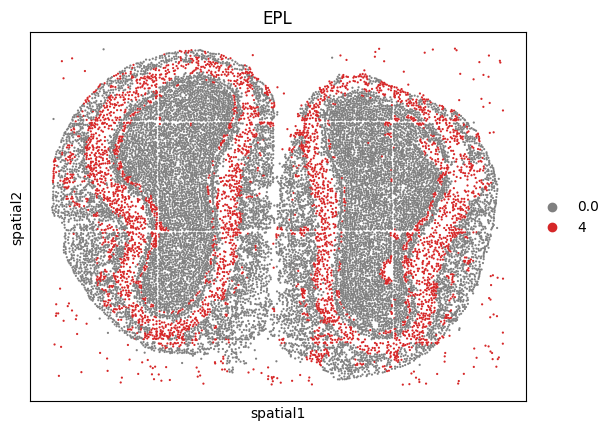

5


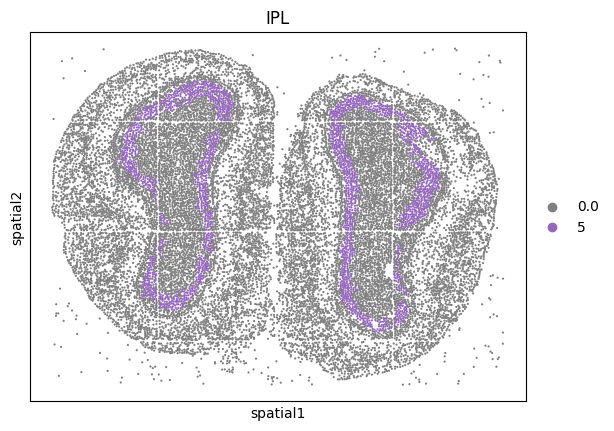

6


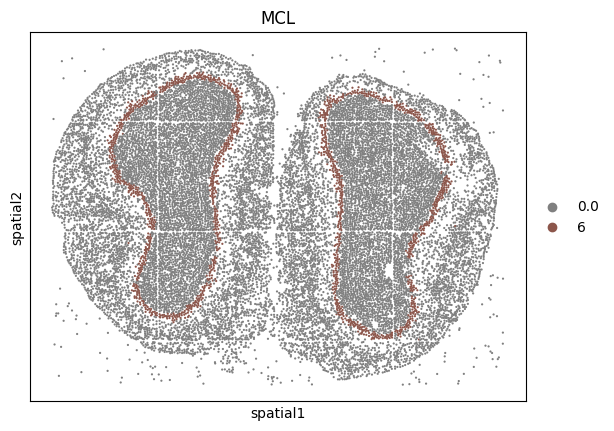

7


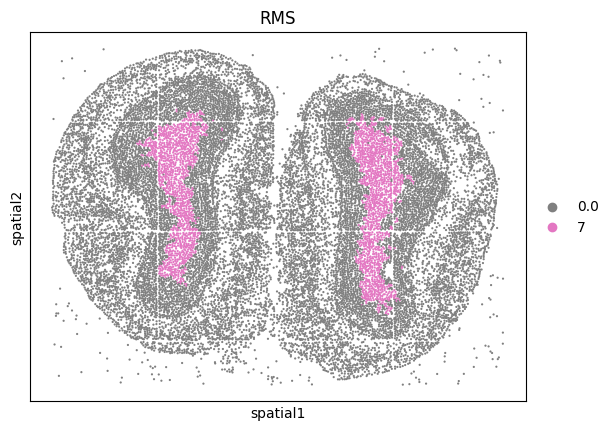

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
pl = ['#1f77b4ff', '#ff7f0eff', '#2ca02cff', '#d62728ff', '#9467bdff', '#8c564bff','#e377c2ff']
title=['GCL','GL','ONL','EPL','IPL','MCL','RMS']
adata.obs['domain']=adata.obs['domain'].astype('str')
clusters = adata.obs['domain'].unique()
print(clusters)
# 创建保存目录
output_dir = './results/Mouse_Olfactory_Bulb/Stereo_seq/clusters'
os.makedirs(output_dir, exist_ok=True)
n_type = config['num_clusters']
zeros = np.zeros([adata.n_obs, n_type])
matrix_clusters = pd.DataFrame(zeros, index=adata.obs_names, columns=clusters)
for cell in list(adata.obs_names):
    cluster = adata.obs.loc[cell, 'domain']
    matrix_clusters.loc[cell, str(cluster)] = cluster
adata.obs[matrix_clusters.columns] = matrix_clusters.astype(str)
# 为每个聚类创建单独的可视化
for j,cluster in enumerate(sorted(clusters)):
    print(cluster)
    sc.pl.embedding(adata, basis="spatial", color=cluster, s=10,title=title[j], palette=['gray', pl[j]],show=False)
    plt.savefig(output_dir +'/'+ title[j] + '.png',bbox_inches='tight', dpi=600)
    plt.show()

AnnData object with n_obs × n_vars = 19527 × 27106
    obsm: 'spatial'
绘制基因 'Mbp' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Mbp_spatial.png


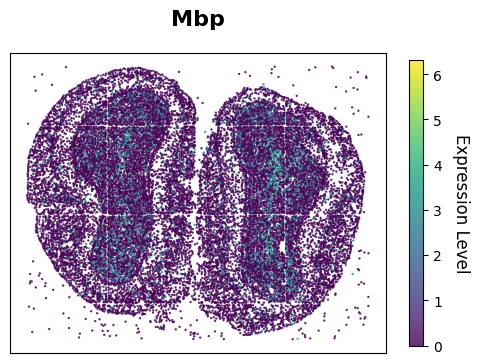

绘制基因 'Nrgn' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Nrgn_spatial.png


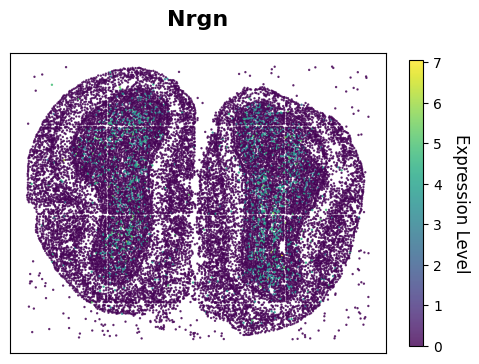

绘制基因 'Pcp4' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Pcp4_spatial.png


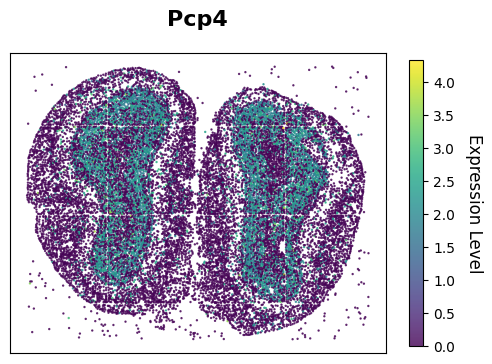

绘制基因 'Gabra1' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Gabra1_spatial.png


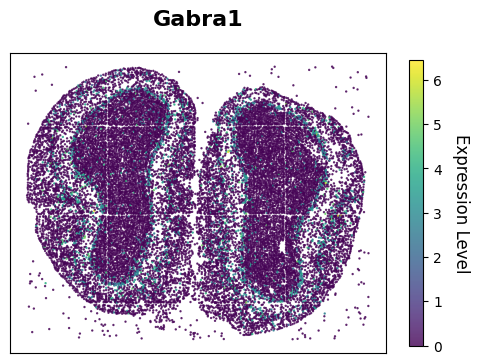

绘制基因 'Slc6a11' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Slc6a11_spatial.png


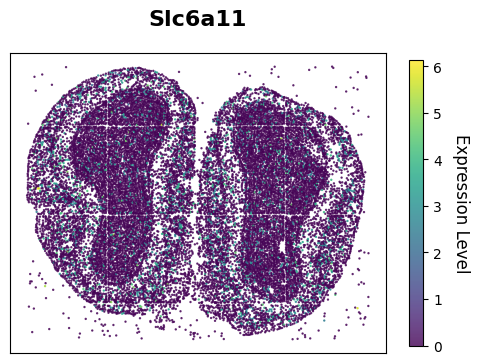

绘制基因 'Cck' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Cck_spatial.png


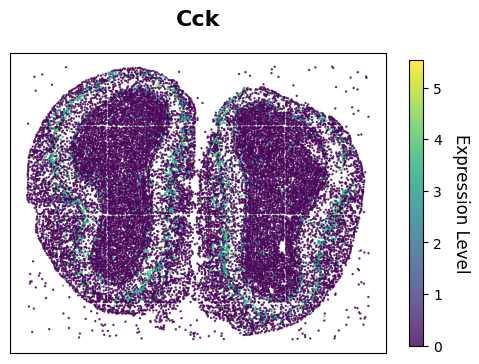

绘制基因 'Apod' 的空间表达分布...
图像已保存到: ./results/Mouse_Olfactory_Bulb/Stereo_seq/genes/Apod_spatial.png


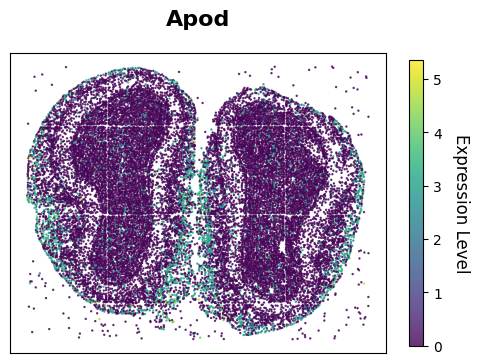

In [16]:
from package.utils import plot_spatial_gene_expression

data=sc.read_h5ad(file_fold+'/'+args.dataset+'/'+args.slice+'/raw.h5ad')
print(data)
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
sc.pp.scale(data, zero_center=False, max_value=10)
data.obsm['spatial'][:,1]=-1*data.obsm['spatial'][:,1]
marker_genes=['Mbp','Nrgn','Pcp4','Gabra1','Slc6a11','Cck','Apod']
for i in marker_genes:
    plot_spatial_gene_expression(data,i,spot_size=0.5,save_path=f'./results/{args.dataset}/{args.slice}/genes/{i}_spatial.png')

In [10]:
# g=1220
# adata.obs['gene']=adata.obsm['gene_feat'][:,g]
# adata.obs['gaussian_smooth']=adata.obsm['smooth_gene'][:,g]
# print(adata.var_names[g])
# sc.pl.embedding(adata, basis='spatial', size=20,color=['gene','gaussian_smooth'], show=True)

In [11]:
# from package.utils import knn_adj_matrix
# from scipy.spatial.distance import cdist
# import pandas as pd
# coor = pd.DataFrame(adata.obsm['spatial'])
# coor_k_interaction = knn_adj_matrix(coor,4,metric='euclidean')
# print('1')
# 
# smooth_gene = pd.DataFrame(adata.obsm['smooth_gene'])
# smooth_gene_cosine=cdist(smooth_gene,smooth_gene,'cosine')
# print('2')
# for i in range(1):
#     smooth_gene_cosine_matrix=coor_k_interaction*smooth_gene_cosine
#     del_col_idx = smooth_gene_cosine_matrix.argmax(axis=1)  # 每行第一个最大值的列索引
#     coor_k_interaction[np.arange(len(del_col_idx)), del_col_idx] = 0
# print('3')
# coor_adj = coor_k_interaction + coor_k_interaction.T
# coor_adj = np.where(coor_adj > 1, 1, coor_adj)
# coor_adj=coor_adj-np.eye(coor_adj.shape[0])

In [12]:
# import networkx as nx
# import matplotlib.pyplot as plt
# 
# A = adata.obsm['graph_neigh']# 邻接矩阵
# pos = adata.obsm['spatial']# 每行对应节点的真实坐标
# 
# # 2. 建图
# G = nx.from_numpy_array(A)             # 无向图；有向加 create_using=nx.DiGraph
# 
# # 3. 把坐标转成 NetworkX 要的 dict 格式
# pos_dict = {i: pos[i] for i in range(len(pos))}
# 
# # 4. 画图
# plt.figure(figsize=(8,8))
# nx.draw(G, pos_dict,
#         with_labels=False,
#         node_color='orange',
#         edgecolors='black',
#         node_size=1,
#         font_weight='bold')
# plt.axis('equal')                      # 保持 x/y 比例一致
# plt.show()